# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

# 1. Loading Libraries and Data

In [107]:
# Loading the required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Loading the dataset
crops = pd.read_csv("soil_measures.csv")

crops

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice
...,...,...,...,...,...
2195,107,34,32,6.780064,coffee
2196,99,15,27,6.086922,coffee
2197,118,33,30,6.362608,coffee
2198,117,32,34,6.758793,coffee


<AxesSubplot: >

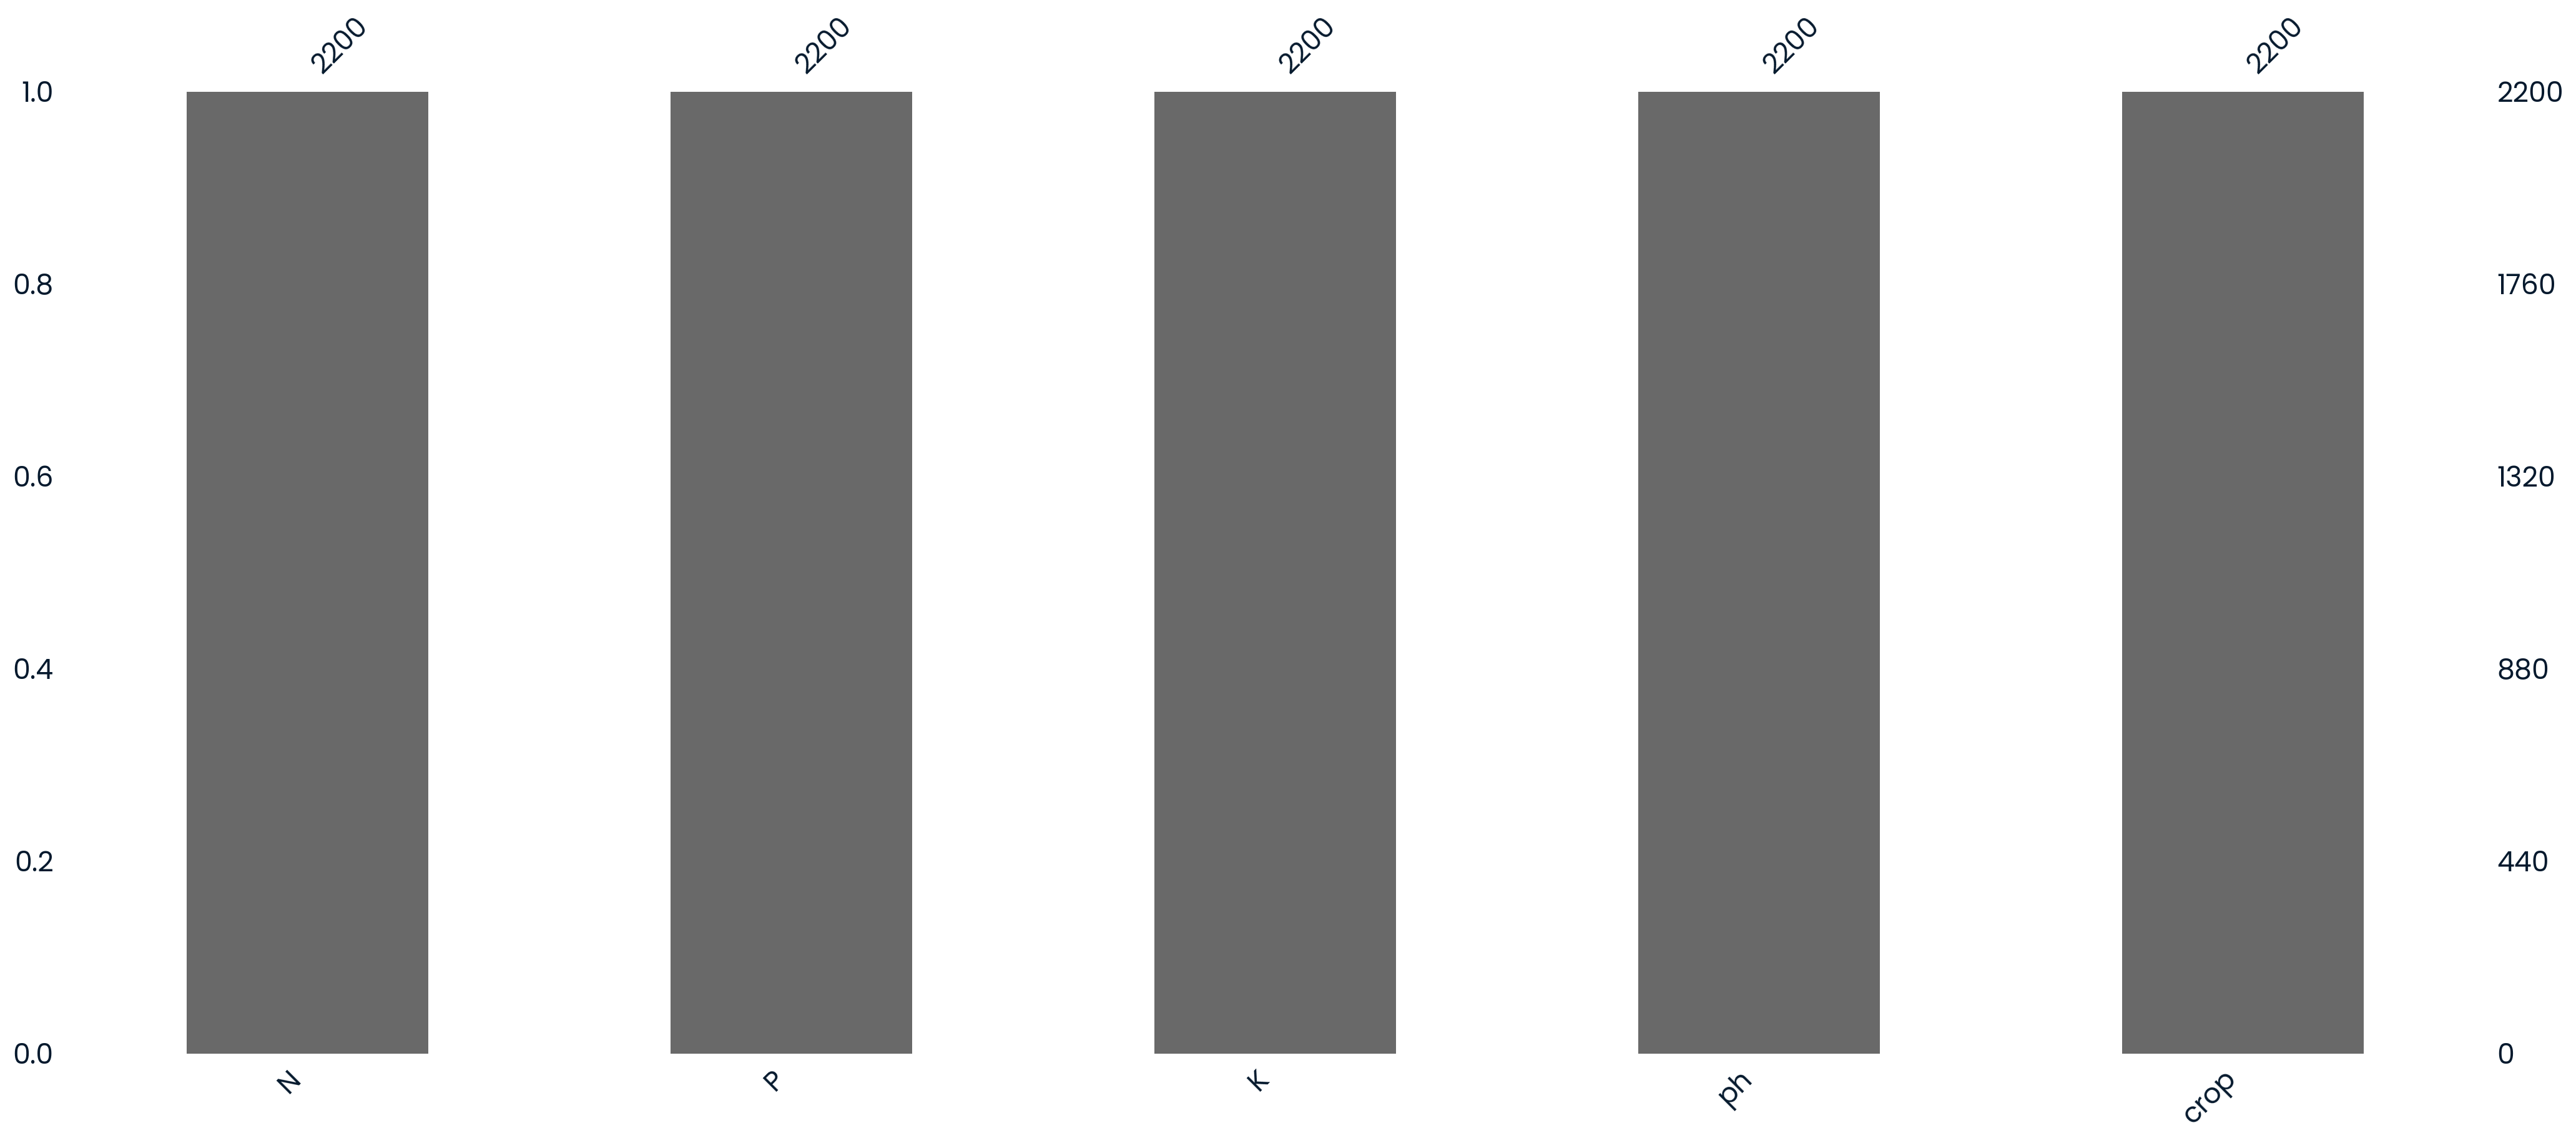

In [108]:
# Checking for missing values
msno.bar(crops)

No missing values found in the dataset

In [109]:
# Dividing the dataset into features and target
X = crops.iloc[:, : -1] # features
y = crops.iloc[:, -1] # target

# One Hot Encoding the target
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1,1))

# Splitting the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 50)

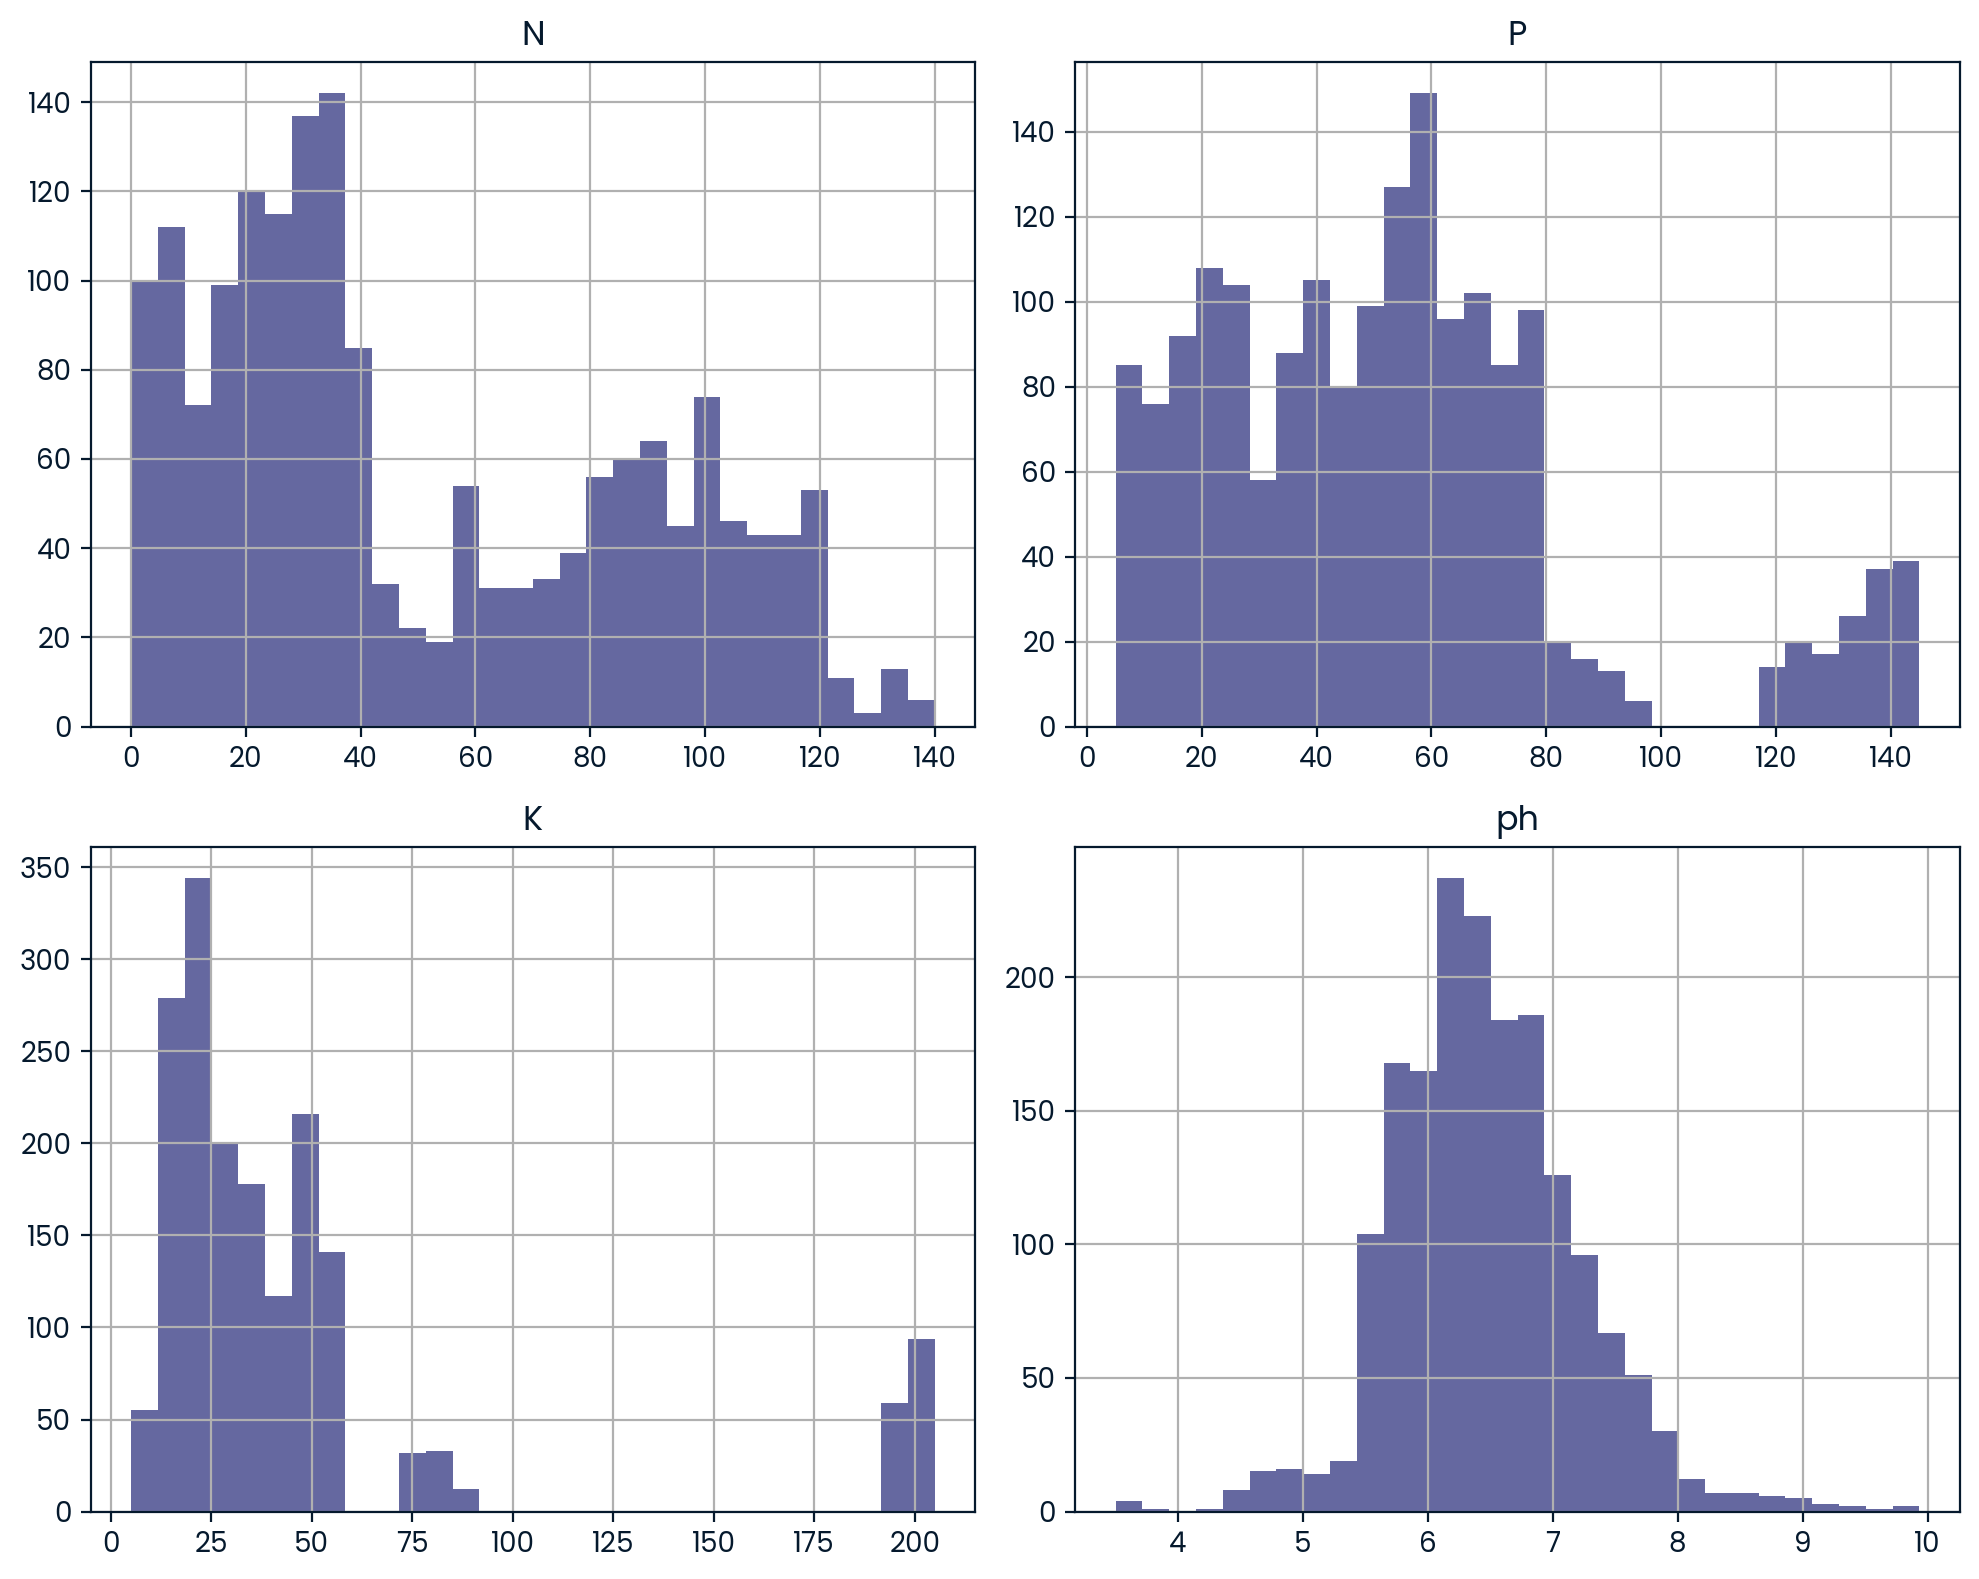

In [110]:
# Checking the distribution of features
X_train.hist(figsize=(10,8), bins=30)
plt.tight_layout()
plt.show()

# 2. Model Training

In [111]:
# Defining a softmax function for computing probabilities
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True)) # Subtracting the max for numerical stability
    sum_x = np.sum(exp_x, axis=1, keepdims=True)
    softmax_output = exp_x/sum_x
    return softmax_output

In [118]:
loss_values = []  # List to store loss values
weight_values = [] # List to store the weights
class_names = y.unique() # Extracting names of unique classes

# Logistic Regression Model
def logistic_regression_train(X, y, learning_rate=0.01, iterations=1000):
    num_samples, num_features = X.shape
    num_classes = y.shape[1]
    weights = np.zeros((num_features, num_classes)) # Initializing weights with zeros
    
    
    for i in range(iterations):
        z = np.dot(X, weights) # The linear combinations
        probabilities = softmax(z) # Computing probabilities
        gradient = np.dot(X.T, (probabilities - y)) / num_samples # Computing the gradients
        
        weights -= learning_rate * gradient # Updating weights using Gradient Descent
        weight_values.append(weights)
        
        loss = -np.sum((y * np.log(probabilities) / num_samples) + 1e-9, axis=1) # Computing loss
        loss_values.append(loss)
        
        
        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {np.mean(loss)}")
            
    avg_loss = np.mean(loss_values) # Overall average loss of the model
    
    # Model Accuracy
    y_pred = np.argmax(probabilities, axis=1)
    y_true = np.argmax(y, axis=1)
    accuracy = accuracy_score(y_true, y_pred)
    
    cm_train = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.show()
    
    print(f"Train Accuracy: {accuracy * 100:.2f}%")
    print(f"Average Training Loss: {avg_loss}")
    
    # Precision, Recall and F1 Score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Feature Importances
    feature_importance = np.mean(np.abs(weights), axis=1) # Final set of weights from the last iteration (absolute values are taken to consider both negative and positive values)
    most_important_feature_idx = np.argmax(feature_importance)

    plt.figure(figsize=(10, 6))
    plt.bar(X.columns, feature_importance)
    plt.xlabel("Feature Index")
    plt.ylabel("Mean Absolute Weight")
    plt.title("Feature Importance")
    plt.grid(axis='y')
    plt.show()
    
    print(f"Most Important Feature is: {X.columns[most_important_feature_idx]}")
    print("Feature Importance (Mean Absolute Weights):", feature_importance)

Iteration 0, Loss: 0.0017562521212263163
Iteration 100, Loss: 0.0023803046649243744
Iteration 200, Loss: 0.0019992590903409255
Iteration 300, Loss: 0.001870286434641638
Iteration 400, Loss: 0.0019513463459919606
Iteration 500, Loss: 0.0016836921077540133
Iteration 600, Loss: 0.001720271127101108
Iteration 700, Loss: 0.0015399503835760318
Iteration 800, Loss: 0.0012957651426727113
Iteration 900, Loss: 0.00133055957730087


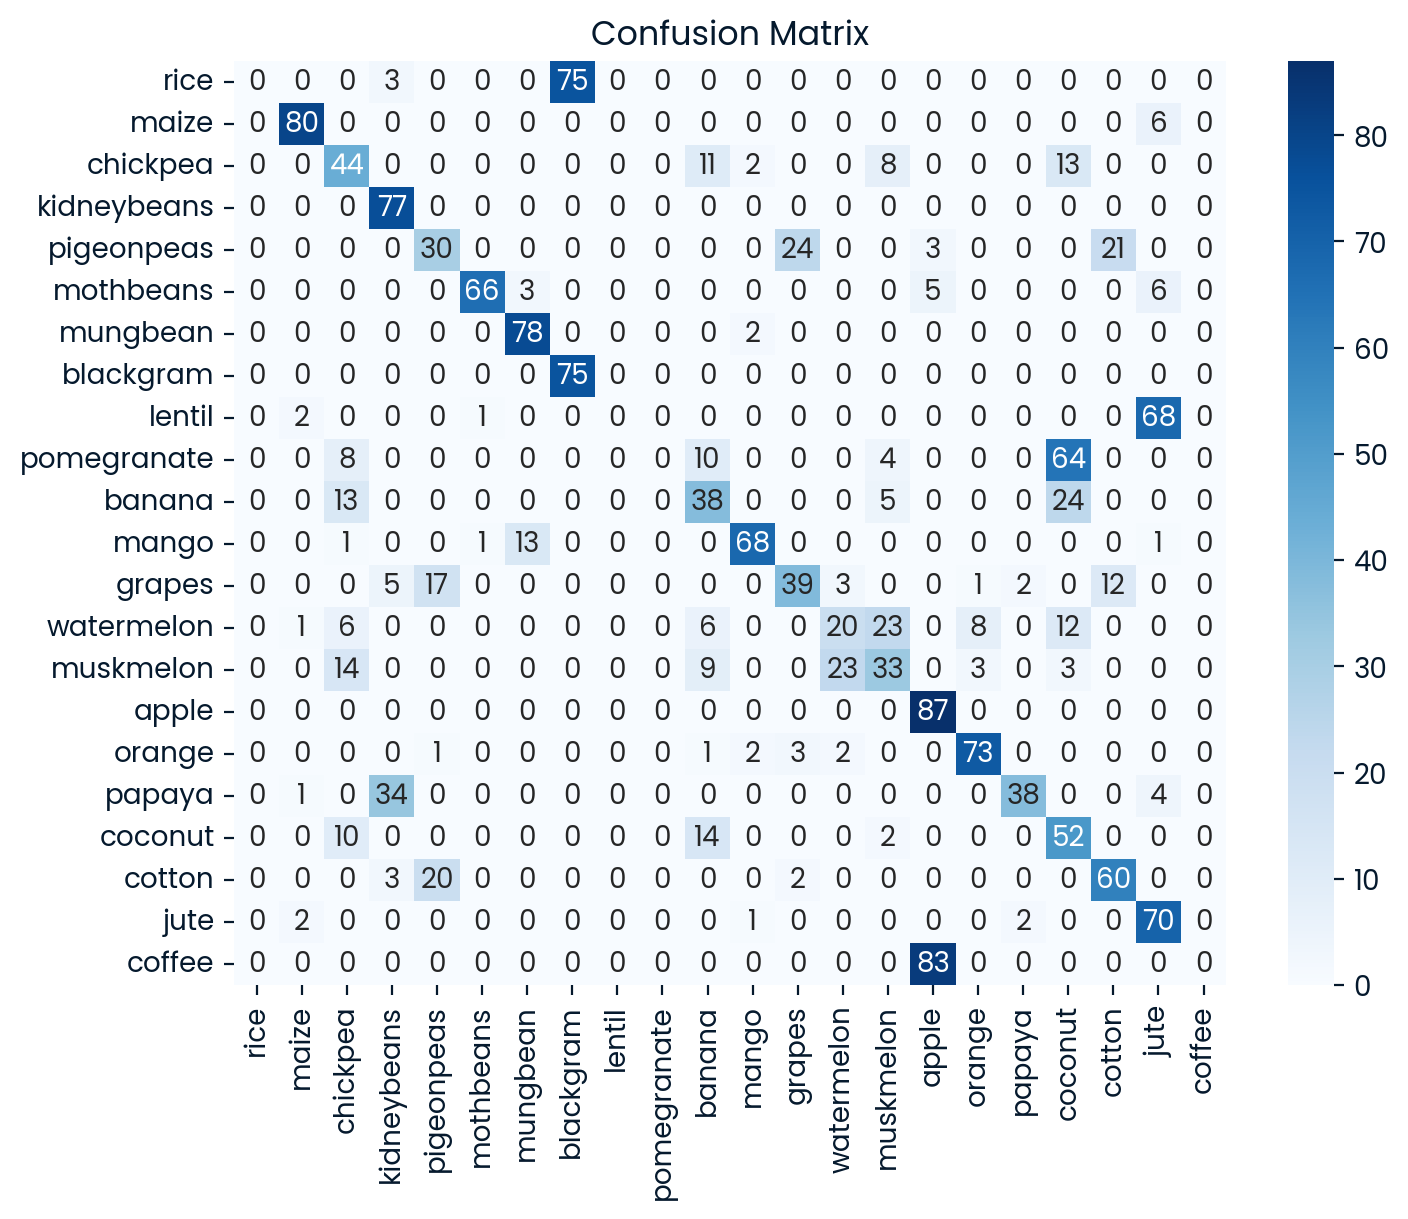

Train Accuracy: 58.41%
Average Training Loss: 0.0016080633715541601
Precision: 0.5116
Recall: 0.5841
F1 Score: 0.5269


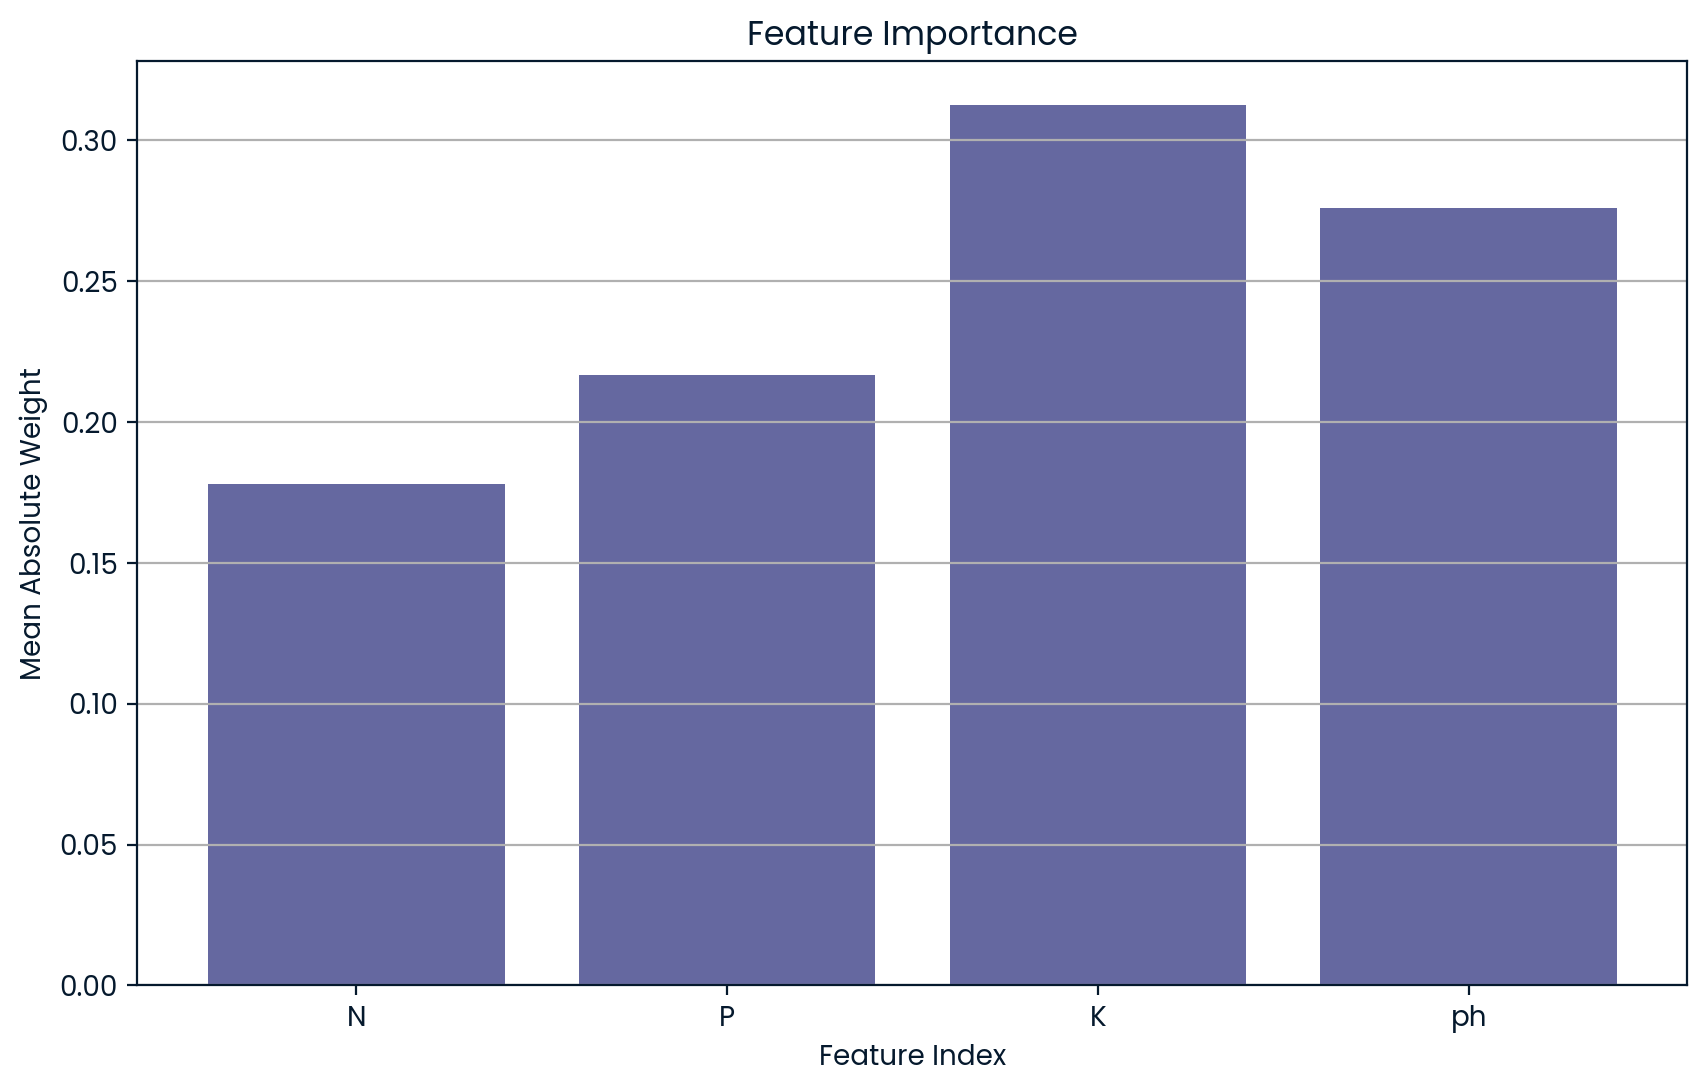

Most Important Feature is: K
Feature Importance (Mean Absolute Weights): [0.1780898  0.2167122  0.31234638 0.27597906]


In [119]:
logistic_regression_train(X_train, y_train)

In [120]:
# Extracting the best weights from training
final_weights = weight_values[-1] # the set of weights from the last iteration when the average loss was the minimum

# 3. Model Testing

In [121]:
def logistic_regression_test(X, y, weights):
    num_samples_test, num_features_test = X_test.shape
    test_prob = softmax(np.dot(X, weights)) # Computing probability
    test_pred = np.argmax(test_prob, axis=1) # Predicted class
    test_true = np.argmax(y, axis=1) # Actual class
    
    test_accuracy = accuracy_score(test_true, test_pred) # Test accuracy
    
    test_loss = -np.mean(np.sum((y * np.log(test_prob) / num_samples_test) + 1e-9, axis=1))
    
    # Precision, Recall and F1 Score
    precision = precision_score(test_true, test_pred, average='weighted')
    recall = recall_score(test_true, test_pred, average='weighted')
    f1 = f1_score(test_true, test_pred, average='weighted')
    
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Test Loss: {test_loss:.6f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [122]:
logistic_regression_test(X_test, y_test, final_weights)

Test Accuracy: 51.59%
Test Loss: 0.006252
Precision: 0.4866
Recall: 0.5159
F1 Score: 0.4382
